# Python Beginners Workshop - Day 3

# Sesson 2: Seaborn

## Learning Goals:
- Introduction to Seaborn
- Exploring different types of plots provided by Seaborn
- Discussing on the advantages and disadvantages of the categorical plots

## Seaborn

Seaborn is a Python data visualization library based on matplotlib. Seaborn focuses on exploring the statistical properties of the data, and relationships between variables:

In short, it helps:
- examining relationships between multiple variables
- support for using categorical variables to show observations or aggregate statistics
- visualizing univariate or bivariate distributions and for comparing them between subsets of data
- Automatic estimation and plotting of linear regression models for different kinds dependent variables
- High-level abstractions for structuring multi-plot grids that let you easily build complex visualizations
- Concise control over matplotlib figure styling with several built-in themes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

## Pair plot: Correlation in multi-dimensional data

When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

In [19]:
df = pd.read_csv('MPI-info.csv')

In [20]:
df.head()

,name,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees,ranking
0,Paul Wong,Female,True,Biochem,26.719182,11,80,4,0,82
1,Tyler Lopez,Male,False,Neuro,36.479622,15,219,6,7,74
2,Suzanne Miller,Male,False,Neuro,29.250290,14,174,5,5,46
3,Rebecca Russo,Female,False,Neuro,29.037500,7,137,3,0,261
4,Timothy Chapman,Male,True,Biochem,26.946125,9,55,3,7,186


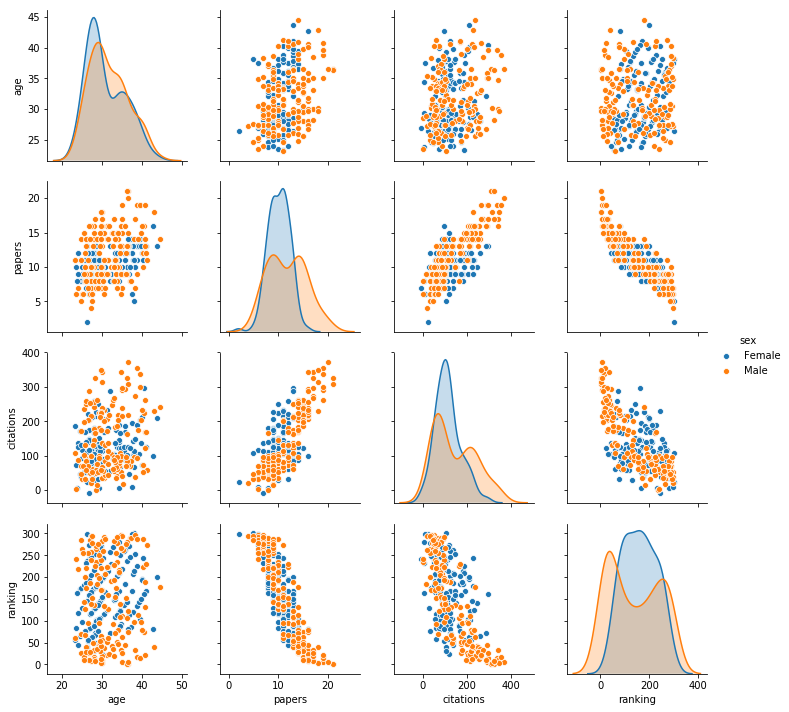

In [25]:
cols = ['age', 'papers', 'citations', 'ranking', 'sex']
sns.pairplot(data=df[cols], hue='sex', height=2.5);

## Categorical Plots

One of the most powerful and useful features of the Seaborn library is its ability to plot statistical figures for categorical data. That is we have a column that let's us "group" our data into different groups, and we are interested to look at the statsitcs of a specific variable (i.e., column) for each category.

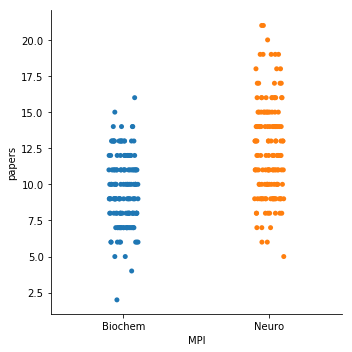

In [26]:
sns.catplot(data=df, x='MPI', y='papers')

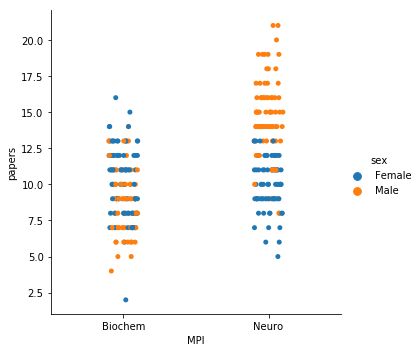

In [27]:
sns.catplot(data=df, x='MPI', y='papers', hue='sex')

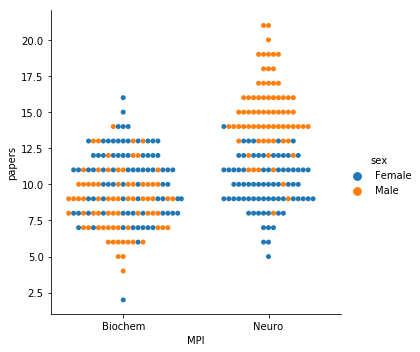

In [28]:
sns.catplot(data=df, x='MPI', y='papers', hue='sex', kind='swarm')

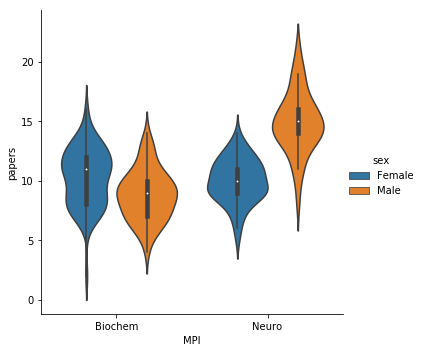

In [30]:
sns.catplot(data=df, x='MPI', y='papers', hue='sex', kind='violin')

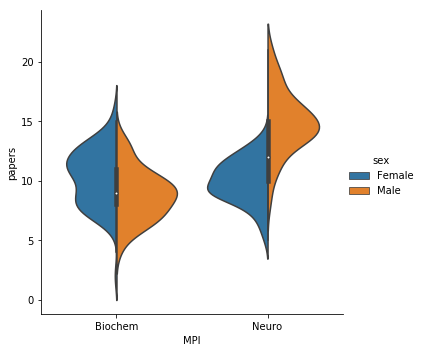

In [31]:
sns.catplot(data=df, x='MPI', y='papers', hue='sex', kind='violin', split=True)

### And of course we can also make it nicer

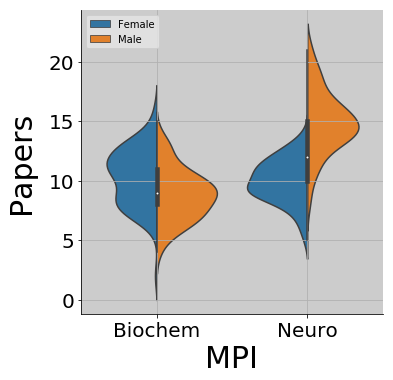

In [71]:
sns.catplot(data=df, x='MPI', y='papers', hue='sex', kind='violin', legend=False, split=True)

plt.xlabel("MPI", fontsize=30)
plt.ylabel("Papers", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='upper left', facecolor='.9')
plt.grid()

ax = plt.gca()
ax.set_facecolor('.8')
ax.yaxis.set_label_coords(-.15, 0.5)

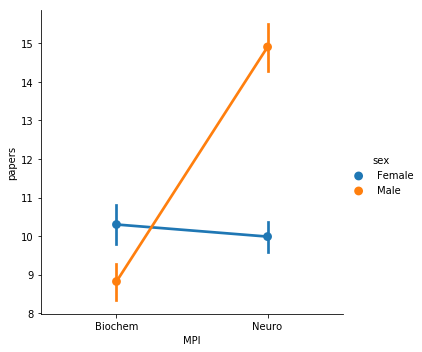

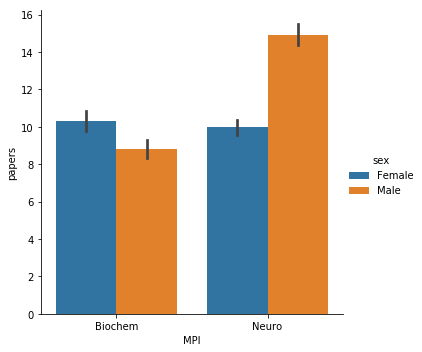

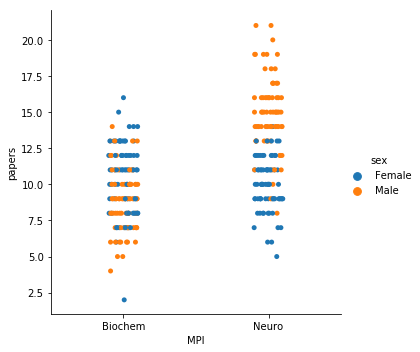

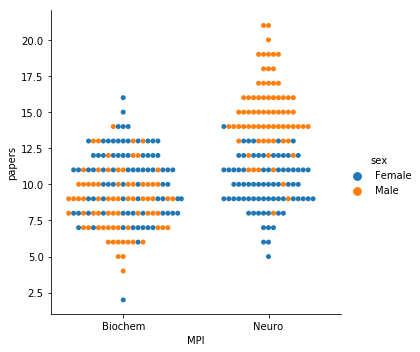

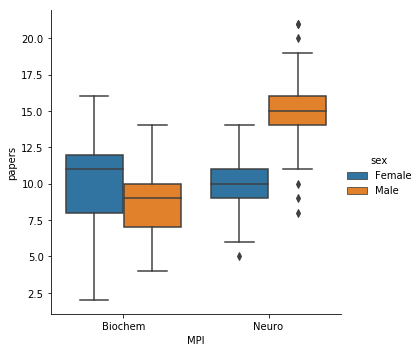

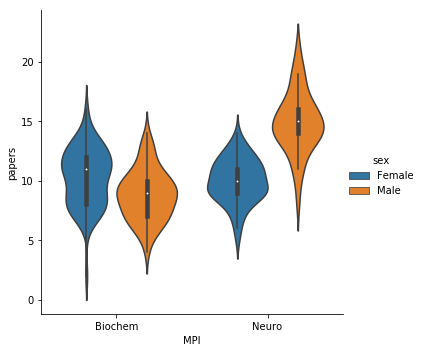

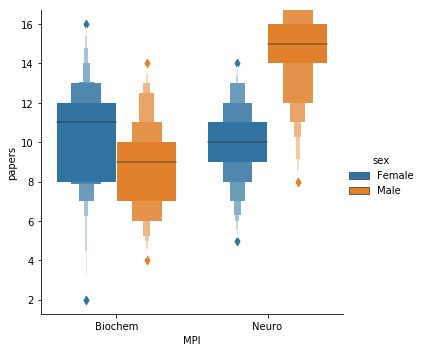

In [72]:
kinds = ["point", "bar", "strip", "swarm", "box", "violin", "boxen"]
for kind in kinds:
    sns.catplot(data=df, x='MPI', y='papers', hue='sex', kind=kind)

---

## Group discussion
Let's form groups of 4 people (4 groups) and discuss about the differences in the figures. <br>
**When would you use which one and why?**

- Estimate
    - point: Show point estimates (mean) and confidence intervals. The estimate can be change by setting the `estimator` option to a function. it uses bootstrapping to compute a confidence interval around the estimate
    - bar: Similar to the point plot, but rather than showing a single point as the estimate, it plots a bar (with reference to zero). this might helpful when we want to view heights relatively (relative to a refernence point = 0).
    - count: A special case of barplot when you want to show the number of observations in each category rather than computing a statistic for a second variable. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. How many datapoints do we have for each category?
    
    
- Scatter
    - strip: Plots the data belonging to each category as points with random jitter along the category axis.
    - swarm: Similar to strip, but instead of random jotter it uses an algorithm that prevents the points from overlapping. As compared to strip, swarm plot can give a better representation of the distribution of observations, although it only works well for relatively small datasets.
    
    
- Distribution
    - box: This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 interquartiles range (IQRs) of the lower and upper quartile, and then observations that fall outside this range are displayed independently. Note that with this kind of plot, we do get a sense of the range of data, as well as the outliers, but not the frequency (like a histrogram).
    - violin: Combines a boxplot with the kernel density estimation. A disadvantage of violin plot is that the kernel is extended to all of the data, regardless of them being the outlier.
    - boxen: similar to a box plot but optimized for showing more information about the shape of the distribution.

**IQRs**
- Q1 is the "middle" value in the first half of the rank-ordered data set.
- Q2 is the median value in the set.
- Q3 is the "middle" value in the second half of the rank-ordered data set.

<center>
    <img src="https://github.com/mohammadbashiri/MPI-python-workshop-2019/blob/master/images/boxplot.png?raw=true" width="50%" height="50%"/>
</center>

<br>

**1. how does Seaborn compute confidence interval?** <br>
**By bootstrapping**. Another way to do this is to assume a normal distribution and then compute the confidence interval by simply computing the lower endpoint (mean - 1.96*(sample_std / sqrt(n))) and the upper endpoint by (mean + 1.96*(sample_std / sqrt(n))). <br>
However, this formula and bootrapping is robust if we have a reasonable sample size (> 30). Otherwise, again assuming that the data is coming from a normal distribution, we should use t-distribution to compute the lower and upper endpoints.

---

## Reference:
- https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial